# Лабораторная работа № 2. Методы классификации
## Выполнил: Нагайцев Илья, 15-АС
### Вариант 15: Титаник
### Задания:
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.linear_model import perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.pylab import rc, plot

df = pd.read_csv(r'titanic3.csv', sep=';')

### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

| Переменная   | Описание  | Параметры(Ключи)  | 
|--------------|--------------|-------------------|
|pclass        |Класс билета  |1 - 1 класс; 2 -  2 класс; 3 -  3 класс |
|survived| Выжил ли пассажир| 0 - Нет ;1 - Да|
|name|Имя|Любой|
|sex|Пол|female - женский, male - мужской|
|age|Возраст|Любой числовой|
|sibsp|Число братьев, сестер, супругов на борту|Любой числовой|
|parch|Число родителей, детей на ботру|Любой числовой|
|fare|Цена билета(британский фунт)|Любой числовой|
|ticket|Номер билета|Любой|
|cabin|Номер каюты|Любой|
|embarked|Порт погрузки|C = Cherbourg, Q = Queenstown, S = Southampton|
|boat|Номер спасательной шлюпки|Любой|
|body|Идентификационный номер тела|Любой|
|home.dest|Домашний адрес|Любой| 

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [6]:
df.shape

(1310, 14)

In [7]:
df = df.drop_duplicates()
df.shape

(1310, 14)

### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

In [8]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
df['survived'].value_counts().plot(kind='barh')

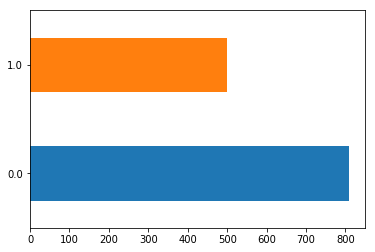

In [10]:
plt.show()

Соотношение количество элементов несколько отличается, поэтому будем считать, что классы не сбалансированны. Будем использовать ROC-кривую, т.к. она дает адекватную оценку качества работы алгоритма, где классы не сбалансированны и их размеры выборки отличаются друг от друга несущественно (не на порядок)

### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [11]:
list_to_drop = ['body', 'boat', 'name', 'cabin', 'ticket', 'home.dest']
df.drop(list_to_drop, axis=1, inplace=True)
def change(obj):
    if type(obj) == str:
        return float(obj.replace(',', '.'))
    else:
        return obj
df['age'] = df['age'].apply(lambda x: change(x))
df['fare'] = df['fare'].apply(lambda x: change(x))
df['pclass'] = df['pclass'].apply(lambda x: change(x))

numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']
print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']
categorial:  ['sex', 'embarked']


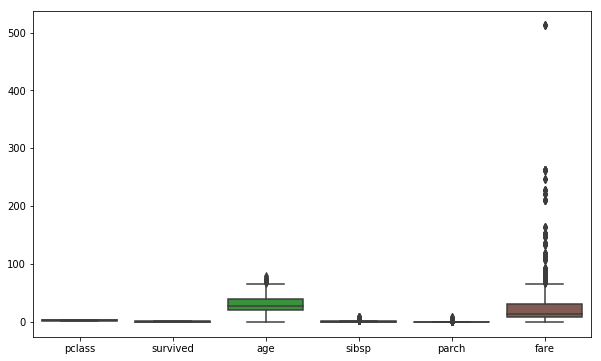

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

В качестве способа масштабирования выберем метод нормализации

In [13]:
# заполним пропущенные значения параметра age медианными
df['age'] = df['age'].fillna(df['age'].median())
df = df.dropna().reset_index(drop=True)
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,0.0,1.0,female,0.361169,0.000,0.000000,0.412503,S
1,0.0,1.0,male,0.009395,0.125,0.222222,0.295806,S
2,0.0,0.0,female,0.022964,0.125,0.222222,0.295806,S
3,0.0,0.0,male,0.373695,0.125,0.222222,0.295806,S
4,0.0,0.0,female,0.311064,0.125,0.222222,0.295806,S


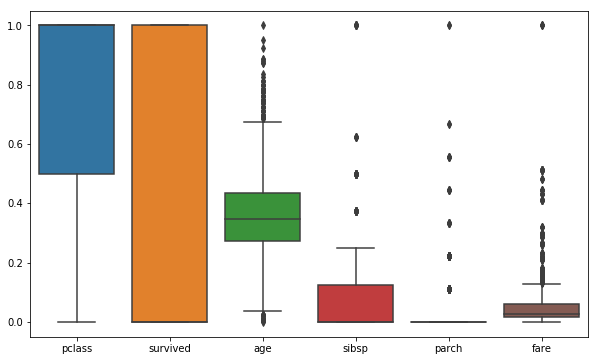

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

### 5.	Выполните замену категориальных признаков

In [15]:
for i in categorial_columns:
    print(i,': ', df[i].unique())

# выделим бинарные и небинарные признаки
binary_columns = [i for i in categorial_columns if len(df[i].unique()) == 2]
nonbinary_columns = [i for i in categorial_columns if len(df[i].unique()) > 2]
for i in binary_columns:
    print('binary_columns:  '+i)
    
# для бинарных заменим значения на 1 и 0
for col in binary_columns:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
# для не бинарых применим dummy-кодирование
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
df.drop(nonbinary_columns, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df] , axis=1)

print(df.shape)

sex :  ['female' 'male']
embarked :  ['S' 'C' 'Q']
binary_columns:  sex
(1306, 10)


### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других(для линейных)

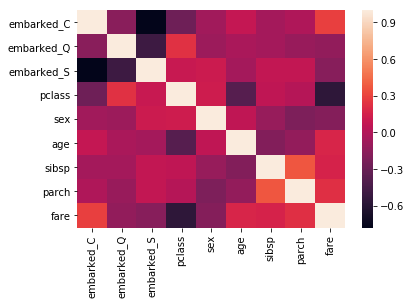

In [16]:
df_corr = df.drop('survived', axis=1).corr()
sns.heatmap(df_corr)
plt.show()

In [17]:
df_corr

,embarked_C,embarked_Q,embarked_S,pclass,sex,age,sibsp,parch,fare
embarked_C,1.000000,-0.164612,-0.778110,-0.271187,-0.067451,0.077591,-0.048985,-0.009161,0.287211
embarked_Q,-0.164612,1.000000,-0.491473,0.230447,-0.089284,-0.029903,-0.049051,-0.101308,-0.129705
embarked_S,-0.778110,-0.491473,1.000000,0.092689,0.116413,-0.049465,0.074487,0.072603,-0.170991
pclass,-0.271187,0.230447,0.092689,1.000000,0.121407,-0.378305,0.060149,0.017596,-0.557861
sex,-0.067451,-0.089284,0.116413,0.121407,1.000000,0.055929,-0.110529,-0.214179,-0.184034
age,0.077591,-0.029903,-0.049465,-0.378305,0.055929,1.000000,-0.188884,-0.124578,0.177627
sibsp,-0.048985,-0.049051,0.074487,0.060149,-0.110529,-0.188884,1.000000,0.373281,0.161030
parch,-0.009161,-0.101308,0.072603,0.017596,-0.214179,-0.124578,0.373281,1.000000,0.222327
fare,0.287211,-0.129705,-0.170991,-0.557861,-0.184034,0.177627,0.161030,0.222327,1.000000


Видна сильная отрицательная зависимость между параметрами, которые были выделены dummy-кодированием

### 7.	Заполните пропущенные значения в данных

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 10 columns):
embarked_C    1306 non-null uint8
embarked_Q    1306 non-null uint8
embarked_S    1306 non-null uint8
pclass        1306 non-null float64
survived      1306 non-null float64
sex           1306 non-null int64
age           1306 non-null float64
sibsp         1306 non-null float64
parch         1306 non-null float64
fare          1306 non-null float64
dtypes: float64(6), int64(1), uint8(3)
memory usage: 75.3 KB


### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества)

Классификатор K ближайших соседей и линейный классификатор

In [19]:
# разделим полученные данные на данные для обучения и теста
X, y = df.drop('survived', axis=1), df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### 1. К-ближайших соседей:

In [20]:

knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 50))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('best train score: ', best_score,
      '\t at neighbors number: ', best_num)

rnc = KNeighborsClassifier(n_neighbors=best_num)
rnc.fit(X_train, y_train)
best_score  = np.mean(y_test  == rnc.predict(X_test))
print('test score: ', best_score)

best train score:  0.7910284463894968 	 at neighbors number:  24
test score:  0.826530612245


#### 2. Линейный классификатор(персептрон)

In [21]:
slf = sk.linear_model.Perceptron()
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,2,20)[1:],n_iter=[int(50)]), n_jobs=int(10))
paramsearch.fit(X_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
print('best score=',best_score,'at alpha',selected_alpha)
best_n_iter = paramsearch.best_estimator_.n_iter
best_n_jobs = paramsearch.best_estimator_.n_jobs

dtc = sk.linear_model.Perceptron(alpha=selected_alpha,n_iter=best_n_iter,n_jobs=best_n_jobs)
dtc.fit(X_train, y_train)
test_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', test_score)

best score= 0.75054704595186 at alpha 0.105263157895
test score:  0.788265306122


Для построения ROC и PR кривых необходимо получить вероятности принадлежности примера к одному из классов, а затем варьировать границу выбора класса. Вероятности можно получить с помощью метода predict_proba

In [22]:
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
    
probas_knn0 = knn.fit(X_train, y_train).predict_proba (X_test)
probas_knn1 = knn.fit(X_train, y_train).predict_proba (X_test)

clf_isotonic = CalibratedClassifierCV(slf, cv=10, method='isotonic')
clf_isotonic.fit(X_train, y_train)
probas_slf0 = clf_isotonic.predict_proba(X_test)
clf_isotonic.fit(X_train, y_train)
probas_slf1 = clf_isotonic.predict_proba(X_test)

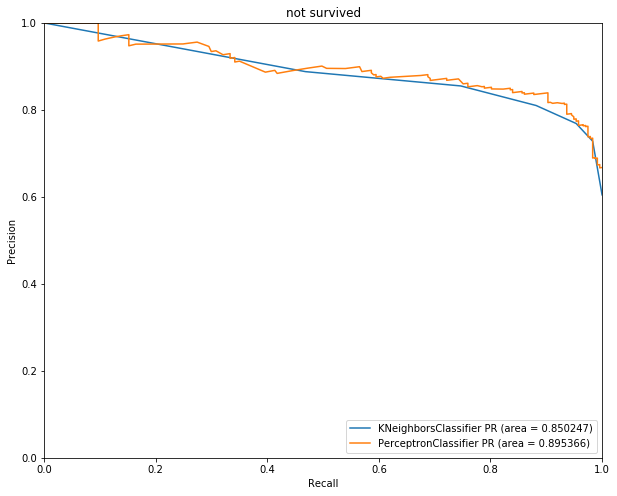

In [23]:
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn1[:,0])
aps_knn1 = average_precision_score(y_test_invers,probas_knn1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn1)) 
# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_slf1[:,0])
aps_slf1 = average_precision_score(y_test_invers,probas_slf1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not survived')
plt.show()

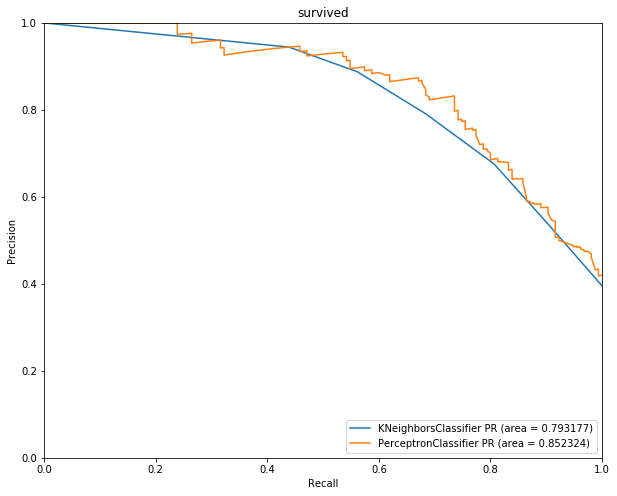

In [24]:
plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn0[:,1])
aps_knn0 = average_precision_score(y_test,probas_knn0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn0)) 
# Персептрон
precision, recall, thresholds = precision_recall_curve(y_test, probas_slf1[:,1])
aps_slf1 = average_precision_score(y_test,probas_slf1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('PerceptronClassifier',  aps_slf1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('survived')
plt.show()

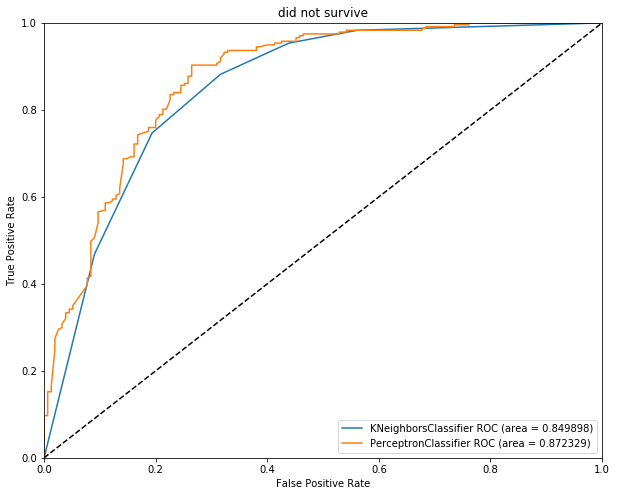

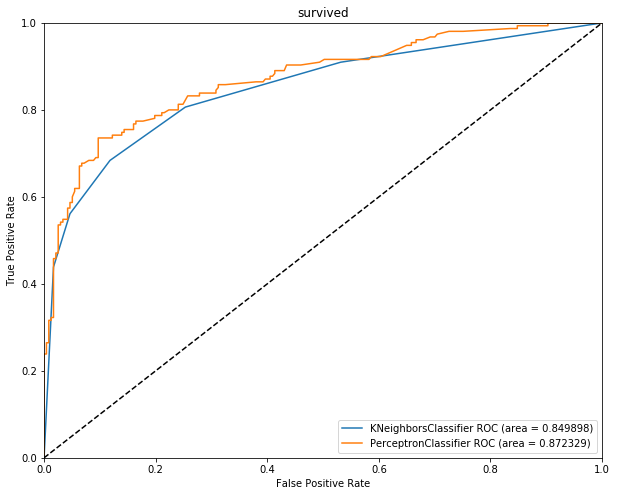

In [25]:
# ROC графики

# --- класс умерших ---
plt.figure(figsize=(10,8))
# K соседей
tpr, fpr, thresholds = roc_curve(y_test, probas_knn0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

# Персептрон
tpr, fpr, thresholds = roc_curve(y_test, probas_slf0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('did not survive')
plt.show()

# --- класс выживших ---
plt.figure(figsize=(10,8))
# K соседей
fpr, tpr, thresholds = roc_curve(y_test, probas_knn1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 
# PerceptronClassifier
fpr, tpr, thresholds = roc_curve(y_test, probas_slf1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('PerceptronClassifier', roc_auc))   
# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('survived')
plt.show()

### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы

Классификаторы персептрон и k ближайших соседей имеют примерно одинаковые показатели качества относительно PR и ROC кривых. Данные классификаторы решают задачу классфикации с вероятностью 0.82~0.87, что является хорошим результатом, т.к. классов всего 2. Поэтому задача классификации была решена корректно